## PyTorch Workflow

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
import seaborn as sns

2.0.1


In [2]:
weight = 0.7
bias = 0.2

# y=a+bx : b is weight and a is bias

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = (weight * X) + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2140],
         [0.2280],
         [0.2420],
         [0.2560],
         [0.2700],
         [0.2840],
         [0.2980],
         [0.3120],
         [0.3260]]))

In [3]:
len(X),len(y)

(50, 50)

In [4]:
# splitting data into train and test
train_split = int(0.8*len(X))
train_split

40

In [5]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

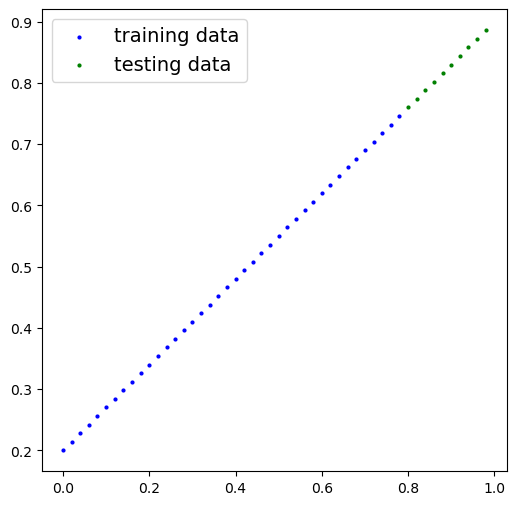

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(6,6))
    plt.scatter(train_data,train_labels,c='b',s=4, label="training data")
    plt.scatter(test_data,test_labels,c='g',s=4, label="testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4, label="prediction")
    plt.legend(prop={"size":14})
    
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        # override forward method
    def forward(self,x:torch.Tensor)->torch.Tensor:
            return (self.weights * x) + self.bias
        

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
#testing model without training
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

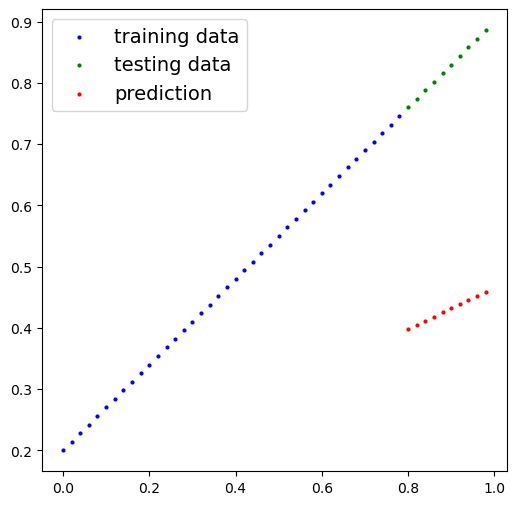

In [11]:
plot_predictions(predictions=y_preds)

## train the model

In [12]:
#loss function
loss_fn = nn.L1Loss() # to see how poorly your model is predicting.
loss_fn

L1Loss()

In [13]:
# set up the optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
# training loop


epochs=200

#tracking improvements
epoch_counts=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    #0 set model to training mode
    model_0.train()
    #1 forward pass
    y_preds = model_0(X_train)
    #2 calculate the loss
    loss=loss_fn(y_preds,y_train)
#     print(loss)
    #3 optimizer zero grad
    optimizer.zero_grad()
    #4 perform back propagation on the loss
    loss.backward()
    #5 step the optimizer
    optimizer.step()
    
    #testing

    model_0.eval()
    with torch.inference_mode():
        test_pred=model_0(X_test)
        test_loss=loss_fn(test_pred,y_test)
    if epoch %5==0:
        epoch_counts.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} |Loss: {loss} |Test Loss: {test_loss}")
        
        
        

Epoch: 0 |Loss: 0.21288137137889862 |Test Loss: 0.38106516003608704
Epoch: 5 |Loss: 0.1552763283252716 |Test Loss: 0.31371015310287476
Epoch: 10 |Loss: 0.10352079570293427 |Test Loss: 0.25147974491119385
Epoch: 15 |Loss: 0.07614791393280029 |Test Loss: 0.2054152488708496
Epoch: 20 |Loss: 0.06281837821006775 |Test Loss: 0.17283539474010468
Epoch: 25 |Loss: 0.056416451930999756 |Test Loss: 0.1508382260799408
Epoch: 30 |Loss: 0.05294134095311165 |Test Loss: 0.13596084713935852
Epoch: 35 |Loss: 0.050631940364837646 |Test Loss: 0.12572267651557922
Epoch: 40 |Loss: 0.04865921288728714 |Test Loss: 0.11750064045190811
Epoch: 45 |Loss: 0.04691421240568161 |Test Loss: 0.11199061572551727
Epoch: 50 |Loss: 0.04516920447349548 |Test Loss: 0.10648057609796524
Epoch: 55 |Loss: 0.04342421144247055 |Test Loss: 0.1009705439209938
Epoch: 60 |Loss: 0.04170272871851921 |Test Loss: 0.09683426469564438
Epoch: 65 |Loss: 0.03998541831970215 |Test Loss: 0.09269803017377853
Epoch: 70 |Loss: 0.03826601430773735 |

In [15]:
print(loss)
print(model_0.state_dict())

tensor(0.0073, grad_fn=<MeanBackward0>)
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])


In [16]:
#testing model without training
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.7525],
        [0.7663],
        [0.7802],
        [0.7940],
        [0.8079],
        [0.8217],
        [0.8356],
        [0.8494],
        [0.8632],
        [0.8771]])

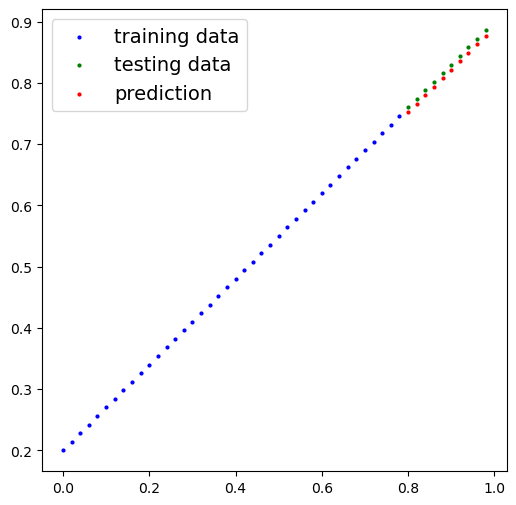

In [17]:
plot_predictions(predictions=y_preds)

In [18]:
# we can increase the epochs to make the model learn more perfectly

## Plotting

In [19]:
epoch_counts,loss_values,test_loss_values

([0,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195],
 [tensor(0.2129, grad_fn=<MeanBackward0>),
  tensor(0.1553, grad_fn=<MeanBackward0>),
  tensor(0.1035, grad_fn=<MeanBackward0>),
  tensor(0.0761, grad_fn=<MeanBackward0>),
  tensor(0.0628, grad_fn=<MeanBackward0>),
  tensor(0.0564, grad_fn=<MeanBackward0>),
  tensor(0.0529, grad_fn=<MeanBackward0>),
  tensor(0.0506, grad_fn=<MeanBackward0>),
  tensor(0.0487, grad_fn=<MeanBackward0>),
  tensor(0.0469, grad_fn=<MeanBackward0>),
  tensor(0.0452, grad_fn=<MeanBackward0>),
  tensor(0.0434, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0400, grad_fn=<MeanBackward0>),
  tensor(0.0383, grad_fn=<MeanBackward0>),
  tensor(0.0365, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0

In [20]:
print(np.array(torch.tensor(loss_values).numpy()))
print(np.array(torch.tensor(test_loss_values).numpy()))

[0.21288137 0.15527633 0.1035208  0.07614791 0.06281838 0.05641645
 0.05294134 0.05063194 0.04865921 0.04691421 0.0451692  0.04342421
 0.04170273 0.03998542 0.03826601 0.03654661 0.03482924 0.03311502
 0.03140081 0.02968179 0.02796239 0.02624299 0.02452731 0.02281309
 0.02109758 0.01937817 0.01765877 0.01593959 0.01422536 0.01251114
 0.01079395 0.00907454 0.00735514 0.00563763 0.00392341 0.00221058
 0.00426255 0.00725845 0.00426255 0.00725845]
[0.38106516 0.31371015 0.25147974 0.20541525 0.1728354  0.15083823
 0.13596085 0.12572268 0.11750064 0.11199062 0.10648058 0.10097054
 0.09683426 0.09269803 0.08856176 0.08442548 0.0809761  0.07683983
 0.07270356 0.06856729 0.06443103 0.06029475 0.05684536 0.05270911
 0.04857287 0.04443662 0.04030039 0.03685106 0.03271481 0.02857857
 0.02444233 0.02030609 0.01616985 0.01272047 0.00858424 0.0051438
 0.005269   0.00820202 0.005269   0.00820202]


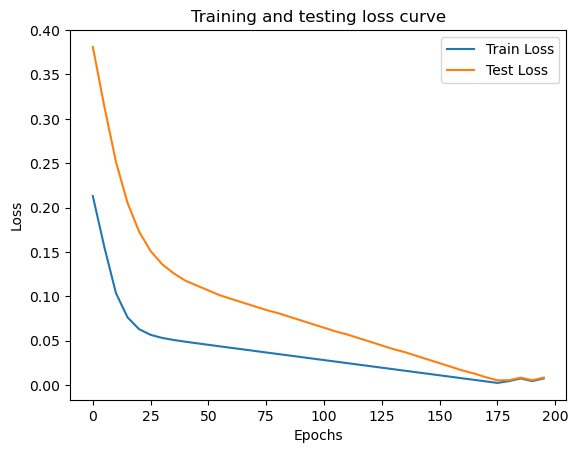

In [21]:
plt.plot(epoch_counts,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_counts,np.array(torch.tensor(test_loss_values).numpy()),label="Test Loss")
plt.title("Training and testing loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## saving model in PyTorch

1.```torch.save()```: python pickle format. save<br>
2.```torch.load()```: load<br>
3.```torch.nn.Module.load_state_dict()```: load models saved dictionary

In [22]:
#saving model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(model_0,MODEL_SAVE_PATH)


In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])

In [24]:
#loading model
model_0_loaded = torch.load(MODEL_SAVE_PATH)
model_0_loaded.state_dict()

OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])

In [25]:
model_0_loaded.eval()
with torch.inference_mode():
    model_0_loaded_preds = model_0_loaded(X_test)
model_0_loaded_preds

tensor([[0.7525],
        [0.7663],
        [0.7802],
        [0.7940],
        [0.8079],
        [0.8217],
        [0.8356],
        [0.8494],
        [0.8632],
        [0.8771]])

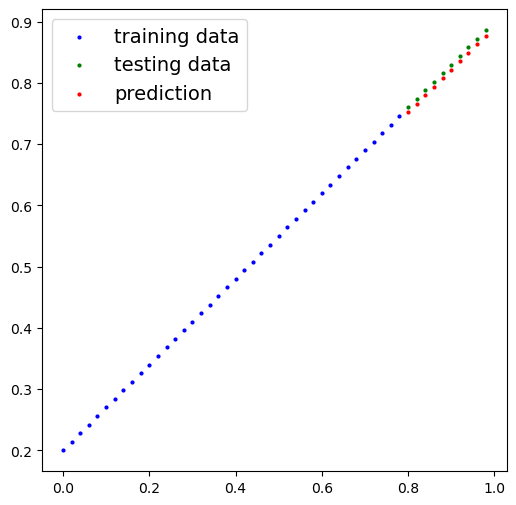

In [26]:
plot_predictions(predictions=model_0_loaded_preds)

In [27]:
y_preds==model_0_loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])